# Sección 8: Reglas de Derivación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff, exp, ln, sin, cos, tan, sec, csc, cot, log

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 1. Regla de la Potencia

**Definición**:
Si $f(x) = ax^n$, entonces $f'(x) = (a \cdot n)x^{n-1}$

### Visualización de derivadas con diferentes potencias


<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in sqrt
  return x**0.5
<lambdifygenerated-10>:2: RuntimeWarning: invalid value encountered in power
  return 0.5*x**(-0.5)


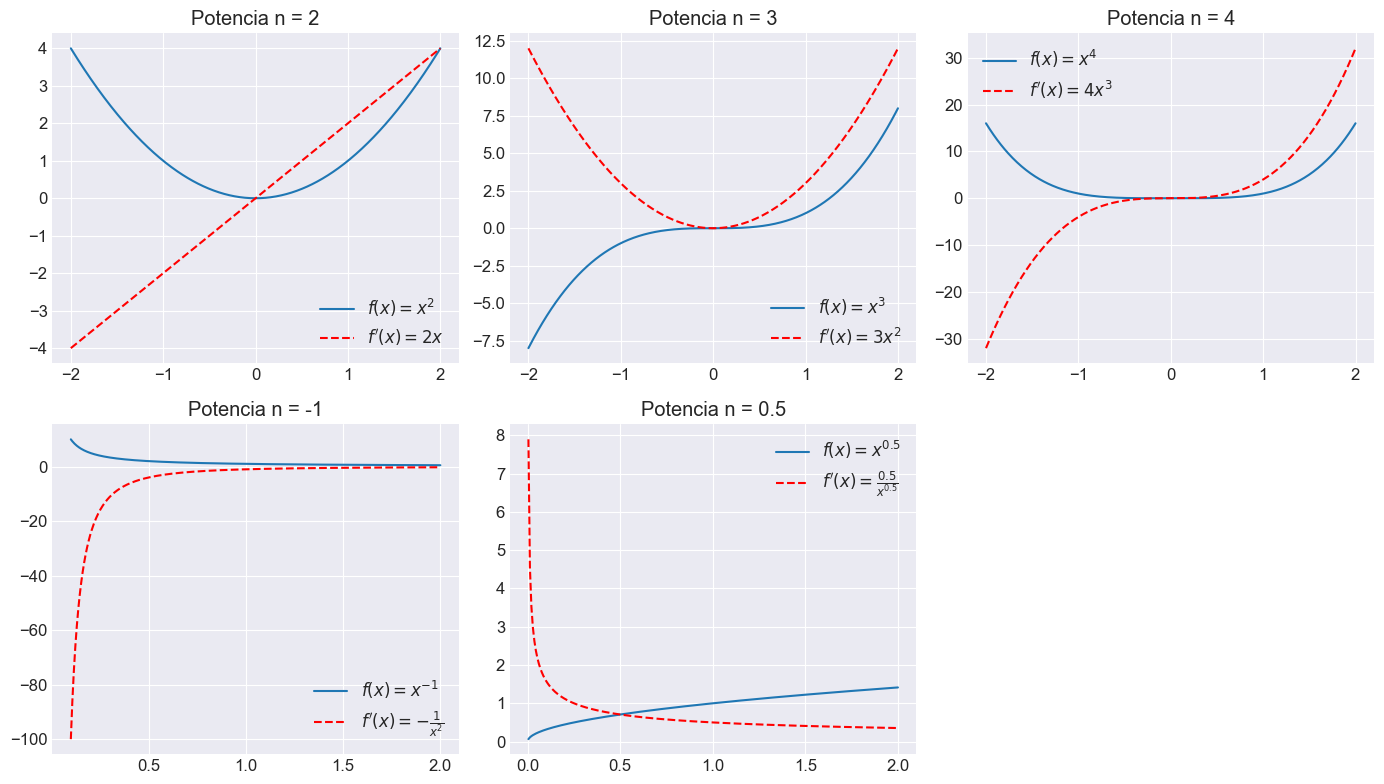

In [2]:
def plot_power_rule_examples():
    x = symbols('x')
    powers = [2, 3, 4, -1, 0.5]
    
    plt.figure(figsize=(14, 8))
    for i, n in enumerate(powers):
        f = x**n
        df = diff(f, x)
        
        # Convertir a funciones numéricas
        f_lamb = sp.lambdify(x, f, 'numpy')
        df_lamb = sp.lambdify(x, df, 'numpy')
        
        x_vals = np.linspace(0.1 if n < 0 else -2, 2, 500)
        
        plt.subplot(2, 3, i+1)
        plt.plot(x_vals, f_lamb(x_vals), label=f'$f(x) = x^{{{n}}}$')
        plt.plot(x_vals, df_lamb(x_vals), 'r--', label=f"$f'(x) = {sp.latex(df)}$")
        plt.title(f'Potencia n = {n}')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_power_rule_examples()

## 2. Reglas Básicas de Derivación

Implementación de las 5 reglas fundamentales:

In [3]:
def basic_derivative_rules():
    x = symbols('x')
    
    # 1. Regla de la constante
    f1 = 5
    df1 = diff(f1, x)
    
    # 2. Regla del múltiplo constante
    f2 = 3*x**2
    df2 = diff(f2, x)
    
    # 3. Regla de la suma
    f3 = x**3 + 4*x
    df3 = diff(f3, x)
    
    # 4. Regla de la resta
    f4 = x**4 - 2*x
    df4 = diff(f4, x)
    
    # 5. Regla de la potencia (ya vista)
    
    # Mostrar resultados
    print("=== Reglas Básicas de Derivación ===")
    print(f"1. Constante: d/dx({f1}) = {df1}")
    print(f"2. Múltiplo constante: d/dx({f2}) = {df2}")
    print(f"3. Suma: d/dx({f3}) = {df3}")
    print(f"4. Resta: d/dx({f4}) = {df4}")

basic_derivative_rules()

=== Reglas Básicas de Derivación ===
1. Constante: d/dx(5) = 0
2. Múltiplo constante: d/dx(3*x**2) = 6*x
3. Suma: d/dx(x**3 + 4*x) = 3*x**2 + 4
4. Resta: d/dx(x**4 - 2*x) = 4*x**3 - 2


## 3. Regla del Producto

**Definición**:
$(f \cdot g)' = f' \cdot g + f \cdot g'$

### Implementación interactiva

=== Regla del Producto ===
Función original: (x**2) * (6*x**3)
Aplicando regla del producto: (2*x)*(6*x**3) + (x**2)*(18*x**2)
Resultado: 30*x**4
Verificación (derivada después de expandir): 30*x**4


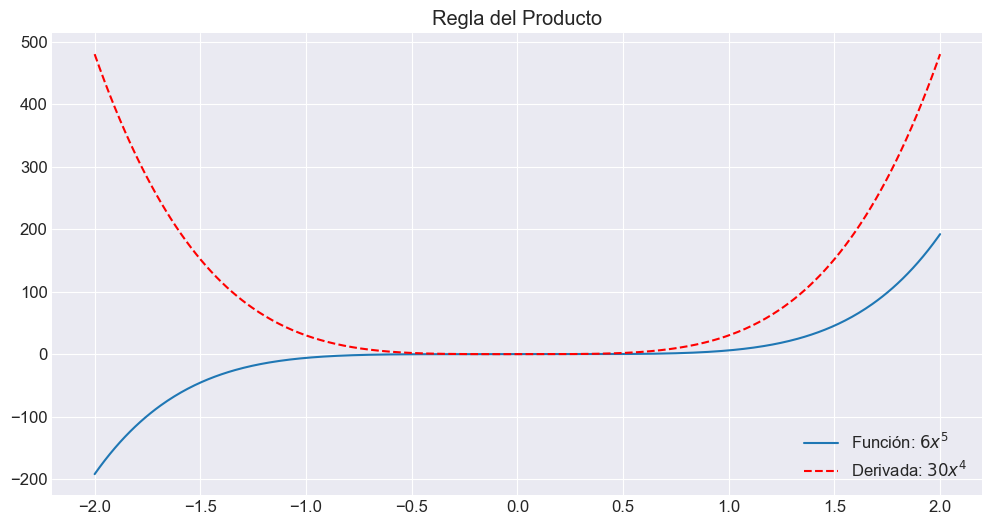

In [4]:
def product_rule_demo():
    x = symbols('x')
    
    # Ejemplo del PDF
    f = x**2
    g = 6*x**3
    df = diff(f, x)
    dg = diff(g, x)
    
    # Aplicar regla del producto
    product_derivative = df*g + f*dg
    
    # Verificación multiplicando primero
    expanded = f*g
    expanded_derivative = diff(expanded, x)
    
    print("=== Regla del Producto ===")
    print(f"Función original: ({f}) * ({g})")
    print(f"Aplicando regla del producto: ({df})*({g}) + ({f})*({dg})")
    print(f"Resultado: {product_derivative}")
    print(f"Verificación (derivada después de expandir): {expanded_derivative}")
    
    # Gráfico comparativo
    x_vals = np.linspace(-2, 2, 500)
    f_lamb = sp.lambdify(x, f*g, 'numpy')
    df_lamb = sp.lambdify(x, product_derivative, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'Función: ${sp.latex(f*g)}$')
    plt.plot(x_vals, df_lamb(x_vals), 'r--', label=f"Derivada: ${sp.latex(product_derivative)}$")
    plt.title('Regla del Producto')
    plt.legend()
    plt.grid(True)
    plt.show()

product_rule_demo()

## 4. Regla del Cociente

**Definición**:
$\left(\frac{f}{g}\right)' = \frac{f' \cdot g - f \cdot g'}{g^2}$

### Implementación con verificación


=== Regla del Cociente ===
Función original: (x**4) / (6*x**2)
Aplicando regla del cociente: [(4*x**3)*(6*x**2) - (x**4)*(12*x)] / (6*x**2)^2
Resultado: x/3
Verificación (derivada después de simplificar): x/3


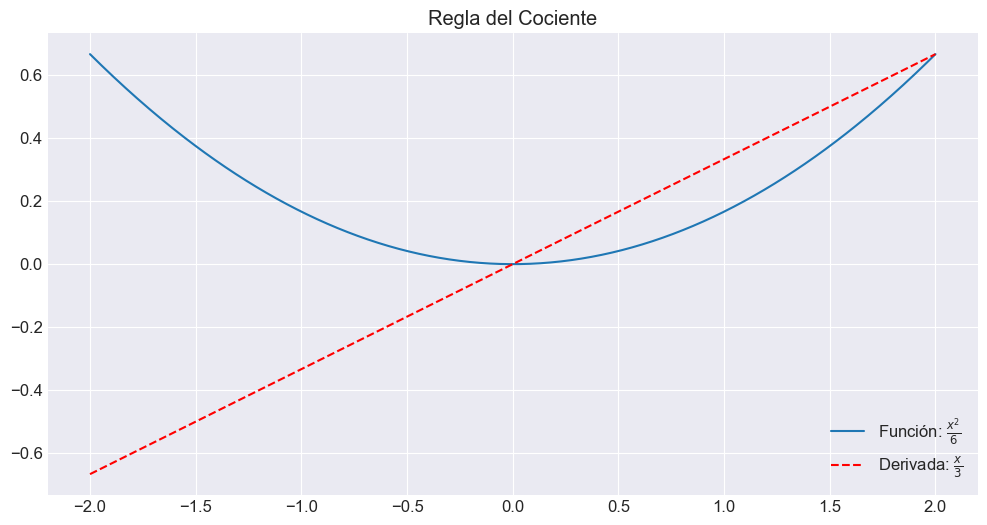

In [5]:
def quotient_rule_demo():
    x = symbols('x')
    
    # Ejemplo del PDF
    f = x**4
    g = 6*x**2
    df = diff(f, x)
    dg = diff(g, x)
    
    # Aplicar regla del cociente
    quotient_derivative = (df*g - f*dg)/(g**2)
    
    # Simplificar primero y luego derivar
    simplified = f/g
    simplified_derivative = diff(simplified, x)
    
    print("=== Regla del Cociente ===")
    print(f"Función original: ({f}) / ({g})")
    print(f"Aplicando regla del cociente: [({df})*({g}) - ({f})*({dg})] / ({g})^2")
    print(f"Resultado: {quotient_derivative.simplify()}")
    print(f"Verificación (derivada después de simplificar): {simplified_derivative}")
    
    # Gráfico comparativo (evitando división por cero)
    x_vals = np.linspace(-2, 2, 500)
    x_vals = x_vals[x_vals != 0]  # Eliminar x=0
    
    f_lamb = sp.lambdify(x, f/g, 'numpy')
    df_lamb = sp.lambdify(x, quotient_derivative, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, f_lamb(x_vals), label=f'Función: ${sp.latex(f/g)}$')
    plt.plot(x_vals, df_lamb(x_vals), 'r--', label=f"Derivada: ${sp.latex(quotient_derivative.simplify())}$")
    plt.title('Regla del Cociente')
    plt.legend()
    plt.grid(True)
    plt.show()

quotient_rule_demo()

## 5. Derivadas de Funciones Trigonométricas

Implementación de las 6 derivadas trigonométricas básicas:

=== Derivadas Trigonométricas ===
1. d/dx(sin(x)) = cos(x)
2. d/dx(cos(x)) = -sin(x)
3. d/dx(tan(x)) = sec(x)**2
4. d/dx(cot(x)) = -csc(x)**2
5. d/dx(sec(x)) = tan(x)*sec(x)
6. d/dx(csc(x)) = -cot(x)*csc(x)


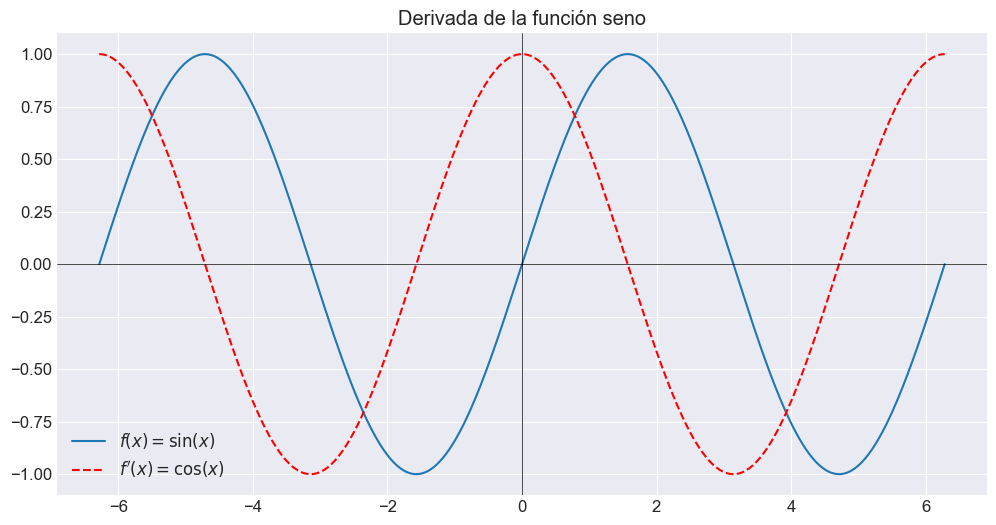

In [7]:
def trig_derivatives_demo():
    x = symbols('x')
    
    # Tabla de derivadas trigonométricas
    trig_functions = [
        (sin(x), cos(x)),
        (cos(x), -sin(x)),
        (tan(x), sec(x)**2),
        (cot(x), -csc(x)**2),
        (sec(x), sec(x)*tan(x)),
        (csc(x), -csc(x)*cot(x))
    ]
    
    print("=== Derivadas Trigonométricas ===")
    for i, (func, deriv) in enumerate(trig_functions):
        print(f"{i+1}. d/dx({func}) = {deriv}")
    
    # Gráfico de ejemplo: sin(x) y su derivada
    x_vals = np.linspace(-2*np.pi, 2*np.pi, 500)
    sin_lamb = sp.lambdify(x, sin(x), 'numpy')
    cos_lamb = sp.lambdify(x, cos(x), 'numpy')
    
    plt.figure()
    plt.plot(x_vals, sin_lamb(x_vals), label=r'$f(x) = \sin(x)$')
    plt.plot(x_vals, cos_lamb(x_vals), 'r--', label=r"$f'(x) = \cos(x)$")
    plt.title('Derivada de la función seno')
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

trig_derivatives_demo()

## 6. Derivadas Exponenciales y Logarítmicas

### 6.1 Funciones Exponenciales

=== Derivadas Exponenciales ===
1. d/dx(e^x) = exp(x)
2. d/dx(a^x) = a**x*log(a)


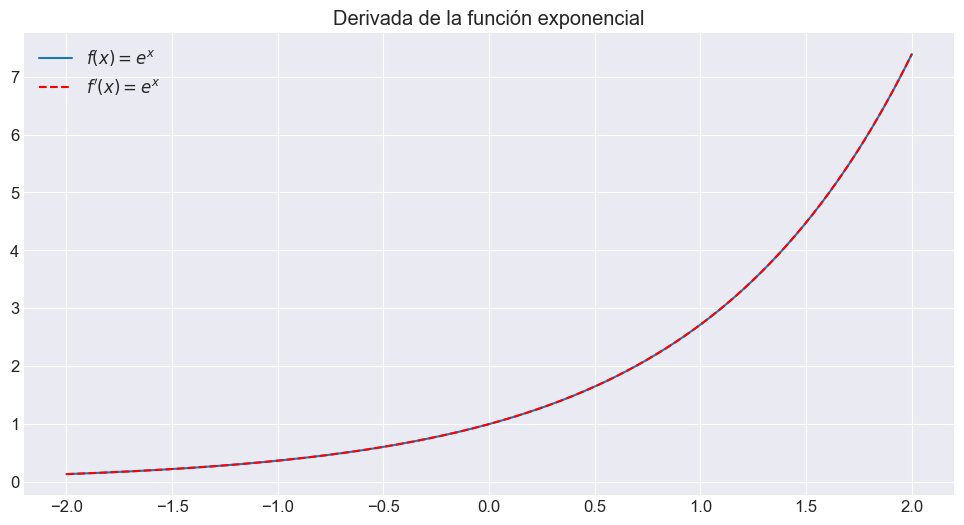

In [8]:
def exponential_derivatives_demo():
    x = symbols('x')
    
    # Derivada de e^x
    f1 = exp(x)
    df1 = diff(f1, x)
    
    # Derivada de a^x
    a = symbols('a', positive=True, real=True)
    f2 = a**x
    df2 = diff(f2, x)
    
    print("=== Derivadas Exponenciales ===")
    print(f"1. d/dx(e^x) = {df1}")
    print(f"2. d/dx(a^x) = {df2}")
    
    # Gráfico de e^x y su derivada
    x_vals = np.linspace(-2, 2, 500)
    exp_lamb = sp.lambdify(x, exp(x), 'numpy')
    
    plt.figure()
    plt.plot(x_vals, exp_lamb(x_vals), label='$f(x) = e^x$')
    plt.plot(x_vals, exp_lamb(x_vals), 'r--', label="$f'(x) = e^x$")
    plt.title('Derivada de la función exponencial')
    plt.legend()
    plt.grid(True)
    plt.show()

exponential_derivatives_demo()

### 6.2 Funciones Logarítmicas

=== Derivadas Logarítmicas ===
1. d/dx(ln(x)) = 1/x
2. d/dx(log_a(x)) = 1/(x*log(a))


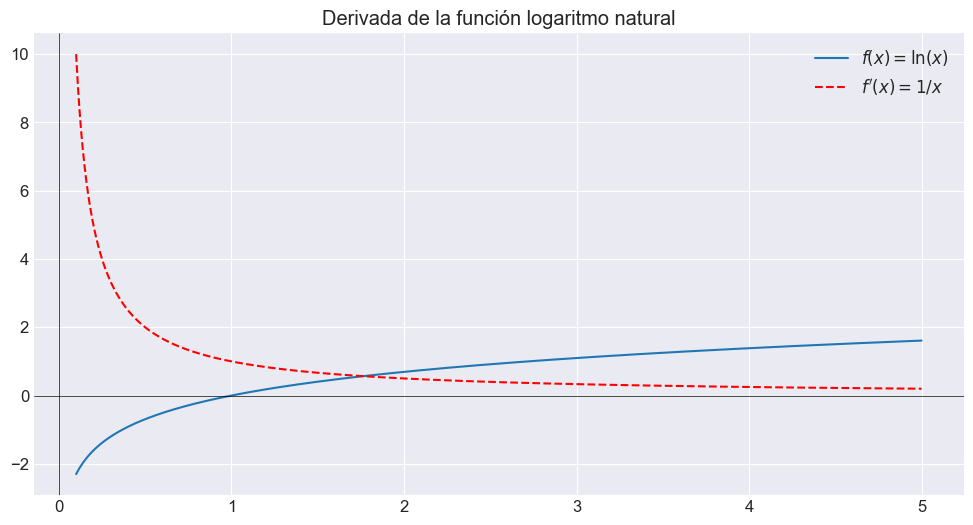

In [10]:
def logarithmic_derivatives_demo():
    x = symbols('x')
    a = symbols('a', positive=True, real=True, ne=1)
    
    # Derivada de ln(x)
    f1 = ln(x)
    df1 = diff(f1, x)
    
    # Derivada de log_a(x)
    f2 = log(x, a)
    df2 = diff(f2, x)
    
    print("=== Derivadas Logarítmicas ===")
    print(f"1. d/dx(ln(x)) = {df1}")
    print(f"2. d/dx(log_a(x)) = {df2}")
    
    # Gráfico de ln(x) y su derivada
    x_vals = np.linspace(0.1, 5, 500)  # ln(x) definida para x > 0
    ln_lamb = sp.lambdify(x, ln(x), 'numpy')
    invx_lamb = sp.lambdify(x, 1/x, 'numpy')
    
    plt.figure()
    plt.plot(x_vals, ln_lamb(x_vals), label=r'$f(x) = \ln(x)$')
    plt.plot(x_vals, invx_lamb(x_vals), 'r--', label=r"$f'(x) = 1/x$")
    plt.title('Derivada de la función logaritmo natural')
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.show()

logarithmic_derivatives_demo()

## Resumen Teórico

| **Regla**               | **Fórmula**                                  | **Ejemplo**                          |
|-------------------------|---------------------------------------------|--------------------------------------|
| Potencia                | $\frac{d}{dx}(x^n) = nx^{n-1}$             | $(x^3)' = 3x^2$                     |
| Constante               | $\frac{d}{dx}(c) = 0$                      | $(5)' = 0$                          |
| Múltiplo constante      | $\frac{d}{dx}(cf) = cf'$                   | $(3x^2)' = 6x$                      |
| Suma/Resta              | $\frac{d}{dx}(f \pm g) = f' \pm g'$        | $(x^2 + x)' = 2x + 1$               |
| Producto                | $(fg)' = f'g + fg'$                        | $(x \cdot \sin x)' = \sin x + x \cos x$ |
| Cociente                | $\left(\frac{f}{g}\right)' = \frac{f'g - fg'}{g^2}$ | $\left(\frac{x}{1+x}\right)' = \frac{1}{(1+x)^2}$ |
| Exponencial             | $(e^x)' = e^x$, $(a^x)' = a^x \ln a$       | $(2^x)' = 2^x \ln 2$                |
| Logarítmica             | $(\ln x)' = \frac{1}{x}$, $(\log_a x)' = \frac{1}{x \ln a}$ | $(\log_3 x)' = \frac{1}{x \ln 3}$ |
